In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
## Load Data
df = pd.read_csv('prod_churn.csv')
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Others,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Others,Others
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
df['Contract']

0             One Year
1       Month-to-Month
2       Month-to-Month
3       Month-to-Month
4       Month-to-Month
             ...      
6413    Month-to-Month
6414          Two Year
6415    Month-to-Month
6416          One Year
6417          Two Year
Name: Contract, Length: 6418, dtype: object

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6418.0,47.070739,16.703633,18.00,33.0000,46.000,60.0000,85.00
Number_of_Referrals,6418.0,7.427859,4.621519,0.00,3.0000,7.000,11.0000,15.00
Tenure_in_Months,6418.0,17.342786,10.576391,1.00,8.0000,16.000,27.0000,36.00
Monthly_Charge,6418.0,63.652867,31.188823,-10.00,30.5625,70.100,89.7500,118.75
Total_Charges,6418.0,2280.374858,2268.049985,18.80,395.7250,1396.125,3783.6000,8684.80
Total_Refunds,6418.0,1.924944,7.849083,0.00,0.0000,0.000,0.0000,49.79
Total_Extra_Data_Charges,6418.0,6.718604,24.722533,0.00,0.0000,0.000,0.0000,150.00
Total_Long_Distance_Charges,6418.0,748.703468,847.672844,0.00,70.8050,407.475,1182.9175,3564.72
Total_Revenue,6418.0,3033.871987,2866.505426,21.36,603.7425,2108.635,4801.5375,11979.34


In [5]:
df.isna().sum()

Customer_ID                       0
Gender                            0
Age                               0
Married                           0
State                             0
Number_of_Referrals               0
Tenure_in_Months                  0
Value_Deal                     3548
Phone_Service                     0
Multiple_Lines                    0
Internet_Service                  0
Internet_Type                  1390
Online_Security                   0
Online_Backup                     0
Device_Protection_Plan            0
Premium_Support                   0
Streaming_TV                      0
Streaming_Movies                  0
Streaming_Music                   0
Unlimited_Data                    0
Contract                          0
Paperless_Billing                 0
Payment_Method                    0
Monthly_Charge                    0
Total_Charges                     0
Total_Refunds                     0
Total_Extra_Data_Charges          0
Total_Long_Distance_Charges 

### Handling Missing Data

In [7]:
df['Internet_Type'] = df['Internet_Type'].fillna('Unknown')
df['Value_Deal'] = df['Value_Deal'].fillna('Unknown')

In [8]:
df.isna().sum()

Customer_ID                    0
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
Churn_Cate

### Data Preprocessing 

In [10]:
#Drop Irrelevant Columns
df = df.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)
df = df[df['Customer_Status'] != 'Joined']

In [11]:
# Encoding variables
cat_columns = df.select_dtypes(include = ['object']).columns.tolist()
cat_columns = cat_columns[:-1]

In [12]:
label_encoders = {}

for col in cat_columns:
    # Create a new encoder for each column
    le = LabelEncoder()
    # Fit and transform in one step
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df['Customer_Status']=df['Customer_Status'].replace({"Stayed":0, "Churned":1})
    
## Data split into target and feature 
X = df.drop('Customer_Status', axis = 1)
y = df['Customer_Status']

## Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C:\Users\malik\AppData\Local\Temp\ipykernel_30512\3345526733.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Customer_Status']=df['Customer_Status'].replace({"Stayed":0, "Churned":1})


### Model Training 

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
#Model Training
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation 

In [16]:
from sklearn.metrics import classification_report
# Predictions
y_pred = rf.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1190   73]
 [ 206  334]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      1263
           1       0.82      0.62      0.71       540

    accuracy                           0.85      1803
   macro avg       0.84      0.78      0.80      1803
weighted avg       0.84      0.85      0.84      1803



C:\Users\malik\AppData\Local\Temp\ipykernel_30512\3209727636.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = importance[indices], y = X.columns[indices], palette='coolwarm')


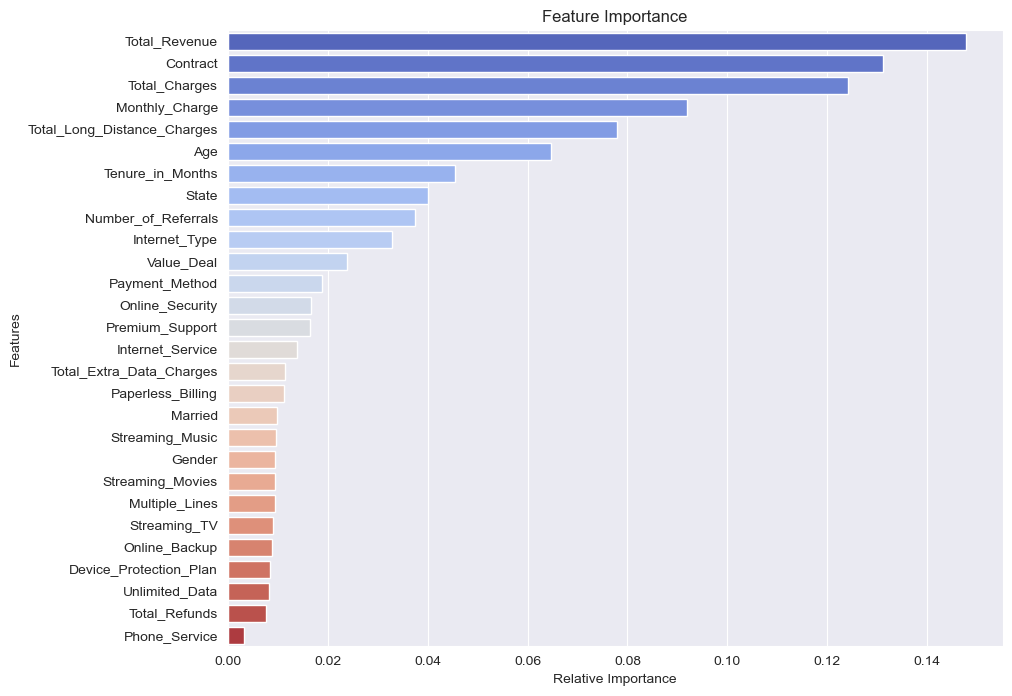

In [17]:
# Feature Selection Using Fetaure Importance
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]

#Plot Feature Importance
plt.figure(figsize= (10, 8))
sns.barplot(x = importance[indices], y = X.columns[indices], palette='coolwarm')
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

### Prediction on Newly Joined Customers Data

In [18]:
df1 = pd.read_csv('prod_churn.csv')
df1 = df1[df1['Customer_Status'] == 'Joined']
df1['Internet_Type'] = df1['Internet_Type'].fillna('Unknown')
df1['Value_Deal'] = df1['Value_Deal'].fillna('Unknown')
original = df1.copy()
customer_ids = df1['Customer_ID']
df1 = df1.drop(['Customer_Status', 'Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)


In [19]:
for col in df1.select_dtypes(include = ['object']).columns.tolist():
    if col in df1.columns:
        df1[col] = label_encoders[col].transform(df1[col])

In [20]:
y_pred_new = rf.predict(df1)

In [21]:
original['Customer_Status_Predicted'] = y_pred_new
original[original['Customer_Status_Predicted']==1]
original.to_csv('Predictions.csv', index = False)